<a href="https://colab.research.google.com/github/msouto/20232_Estatistica_para_Engenharia/blob/main/EX_6_dist_fitt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

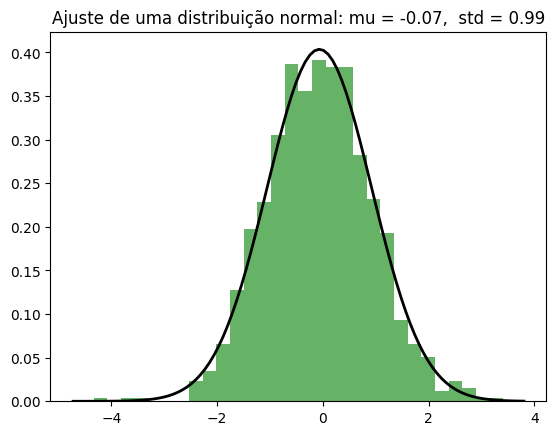

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot

# Gere dados de uma distribuição normal
dados = np.random.normal(loc=0, scale=1, size=1000)

# Ajuste uma distribuição normal aos dados
mu, std = norm.fit(dados)

# Crie um histograma dos dados
plt.hist(dados, bins=30, density=True, alpha=0.6, color='g')

# Crie uma linha para representar a distribuição ajustada
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Adicione informações ao gráfico
title = "Ajuste de uma distribuição normal: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.show()


Para ajustar várias distribuições de probabilidade aos dados e avaliar qual delas se ajusta melhor, você pode usar a técnica de ajuste de distribuição.

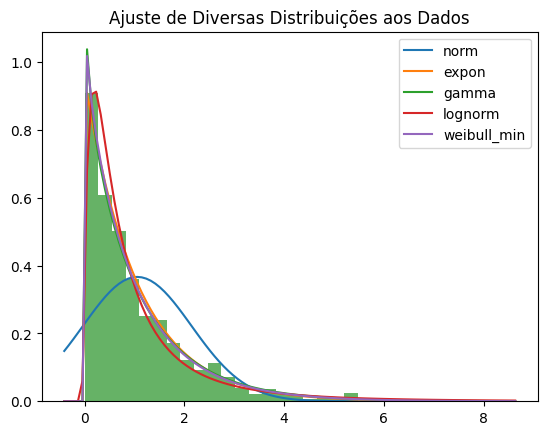

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, gamma, lognorm, weibull_min
from scipy.stats import probplot

# Gere dados de uma distribuição não normal (exponencial neste caso)
dados = np.random.exponential(scale=1, size=1000)

# Ajuste várias distribuições aos dados
distribuicoes = [norm, expon, gamma, lognorm, weibull_min]
parametros_ajustados = []

for distribuicao in distribuicoes:
    # Ajuste da distribuição aos dados
    params = distribuicao.fit(dados)
    parametros_ajustados.append(params)

# Crie um histograma dos dados
plt.hist(dados, bins=30, density=True, alpha=0.6, color='g')

# Plote as distribuições ajustadas
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

for i, distribuicao in enumerate(distribuicoes):
    params = parametros_ajustados[i]
    pdf = distribuicao.pdf(x, *params)
    plt.plot(x, pdf, label=f'{distribuicao.name}')

# Adicione informações ao gráfico
plt.legend()
plt.title('Ajuste de Diversas Distribuições aos Dados')
plt.show()


Para comparar as diferentes distribuições e avaliar qual se ajusta melhor aos dados, podemos utilizar critérios como o Critério de Informação de Akaike (AIC) ou o Critério de Informação Bayesiano (BIC).



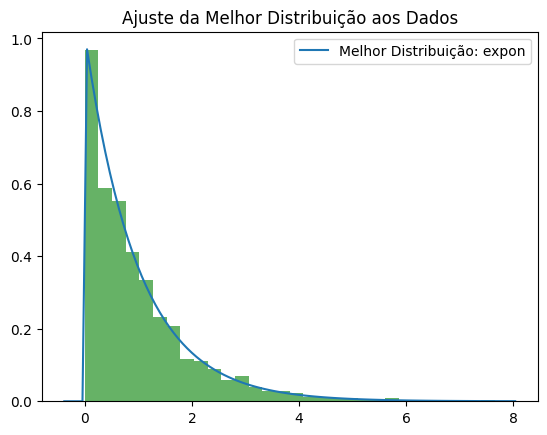

Melhor Distribuição: expon
Parâmetros Ajustados: (0.00025237146782303583, 0.987201469171439)
AIC: 1978.237724777085
BIC: 1988.0532353350493
Teste de Kolmogorov-Smirnov p-value: 0.6433662204968493


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, gamma, lognorm, weibull_min
from scipy.stats import probplot
from scipy.stats import kstest
from scipy.stats import kstest

# Gere dados de uma distribuição não normal (exponencial neste caso)
dados = np.random.exponential(scale=1, size=1000)

# Ajuste várias distribuições aos dados
distribuicoes = [norm, expon, gamma, lognorm, weibull_min]
parametros_ajustados = []

# Calcule o AIC e o BIC para cada distribuição
aic_values = []
bic_values = []

for distribuicao in distribuicoes:
    # Ajuste da distribuição aos dados
    params = distribuicao.fit(dados)
    parametros_ajustados.append(params)

    # Calcule AIC e BIC
    log_likelihood = distribuicao.logpdf(dados, *params).sum()
    num_params = len(params)
    aic = 2 * num_params - 2 * log_likelihood
    bic = np.log(len(dados)) * num_params - 2 * log_likelihood

    aic_values.append(aic)
    bic_values.append(bic)

# Encontre a distribuição com menor AIC ou BIC
melhor_distribuicao_idx = np.argmin(aic_values)  # Troque para np.argmin(bic_values) se preferir BIC
melhor_distribuicao = distribuicoes[melhor_distribuicao_idx]
melhores_parametros = parametros_ajustados[melhor_distribuicao_idx]

# Crie um histograma dos dados
plt.hist(dados, bins=30, density=True, alpha=0.6, color='g')

# Plote a melhor distribuição ajustada
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = melhor_distribuicao.pdf(x, *melhores_parametros)
plt.plot(x, pdf, label=f'Melhor Distribuição: {melhor_distribuicao.name}')

# Adicione informações ao gráfico
plt.legend()
plt.title('Ajuste da Melhor Distribuição aos Dados')
plt.show()

# Imprima informações sobre a melhor distribuição
print(f'Melhor Distribuição: {melhor_distribuicao.name}')
print(f'Parâmetros Ajustados: {melhores_parametros}')
print(f'AIC: {aic_values[melhor_distribuicao_idx]}')
print(f'BIC: {bic_values[melhor_distribuicao_idx]}')

# Teste de Kolmogorov-Smirnov para a melhor distribuição
ks_stat, ks_p_value = kstest(dados, cdf=melhor_distribuicao.cdf, args=melhores_parametros)
print(f'Teste de Kolmogorov-Smirnov p-value: {ks_p_value}')


# Teste de Kolmogorov-Smirnov (KS)

O teste de Shapiro-Wilk é comumente usado para verificar a normalidade dos dados. Entretanto, quando estamos avaliando a adequação de dados a uma distribuição específica (além da normal), o teste de Kolmogorov-Smirnov (KS) é frequentemente empregado.

O teste de Kolmogorov-Smirnov é uma medida não paramétrica que compara a distribuição empírica dos dados com a distribuição teórica que você está tentando ajustar. Ele é sensível a desvios em qualquer parte da distribuição, não apenas nas caudas, o que pode ser útil ao avaliar a adequação de uma distribuição específica.

Portanto, ao ajustar várias distribuições e selecionar a melhor com base em critérios como AIC ou BIC, você pode usar o teste de Kolmogorov-Smirnov para verificar a adequação final da distribuição escolhida.



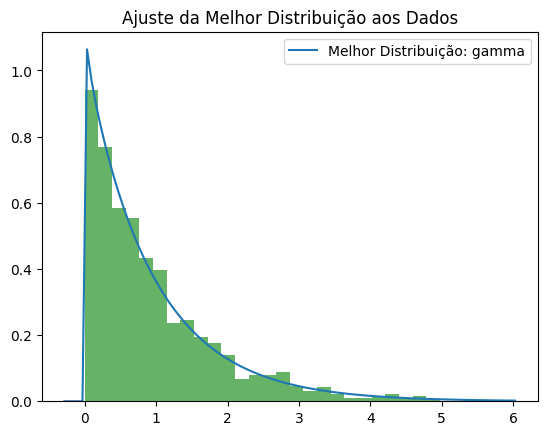

Melhor Distribuição: gamma
Parâmetros Ajustados: (0.9736686237474732, 0.00044895470711372835, 0.980027618168662)
AIC: 1902.1757117866557
BIC: 1916.8989776236021
Teste de Kolmogorov-Smirnov p-value: 0.7024865979366872


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, gamma, lognorm, weibull_min, kstest
from scipy.stats import probplot

# Gere dados de uma distribuição não normal (exponencial neste caso)
dados = np.random.exponential(scale=1, size=1000)

# Ajuste várias distribuições aos dados
distribuicoes = [norm, expon, gamma, lognorm, weibull_min]
parametros_ajustados = []

# Calcule o AIC e o BIC para cada distribuição
aic_values = []
bic_values = []

for distribuicao in distribuicoes:
    # Ajuste da distribuição aos dados
    params = distribuicao.fit(dados)
    parametros_ajustados.append(params)

    # Calcule AIC e BIC
    log_likelihood = distribuicao.logpdf(dados, *params).sum()
    num_params = len(params)
    aic = 2 * num_params - 2 * log_likelihood
    bic = np.log(len(dados)) * num_params - 2 * log_likelihood

    aic_values.append(aic)
    bic_values.append(bic)

# Encontre a distribuição com menor AIC ou BIC
melhor_distribuicao_idx = np.argmin(aic_values)  # Troque para np.argmin(bic_values) se preferir BIC
melhor_distribuicao = distribuicoes[melhor_distribuicao_idx]
melhores_parametros = parametros_ajustados[melhor_distribuicao_idx]

# Crie um histograma dos dados
plt.hist(dados, bins=30, density=True, alpha=0.6, color='g')

# Plote a melhor distribuição ajustada
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = melhor_distribuicao.pdf(x, *melhores_parametros)
plt.plot(x, pdf, label=f'Melhor Distribuição: {melhor_distribuicao.name}')

# Adicione informações ao gráfico
plt.legend()
plt.title('Ajuste da Melhor Distribuição aos Dados')
plt.show()

# Imprima informações sobre a melhor distribuição
print(f'Melhor Distribuição: {melhor_distribuicao.name}')
print(f'Parâmetros Ajustados: {melhores_parametros}')
print(f'AIC: {aic_values[melhor_distribuicao_idx]}')
print(f'BIC: {bic_values[melhor_distribuicao_idx]}')

# Teste de Kolmogorov-Smirnov para a melhor distribuição
ks_stat, ks_p_value = kstest(dados, cdf=melhor_distribuicao.cdf, args=melhores_parametros)
print(f'Teste de Kolmogorov-Smirnov p-value: {ks_p_value}')


Vamos tentar uma abordagem utilizando uma técnica chamada Quantile-Quantile Plot (QQ Plot) para visualizar o ajuste de várias distribuições. Isso pode ajudar a identificar visualmente a distribuição que melhor se ajusta aos seus dados.


<Figure size 1200x800 with 0 Axes>

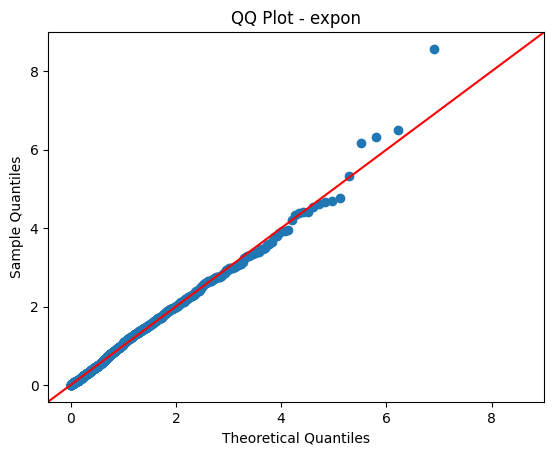

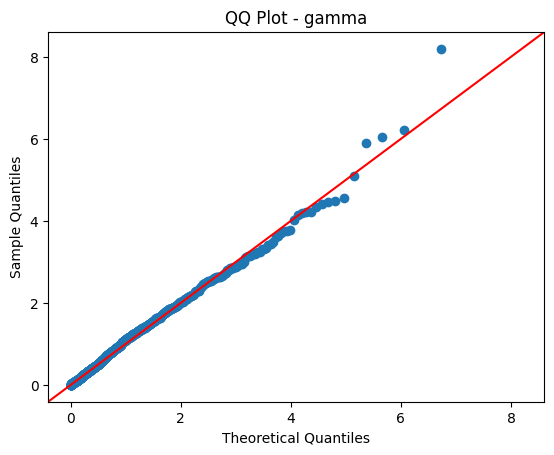

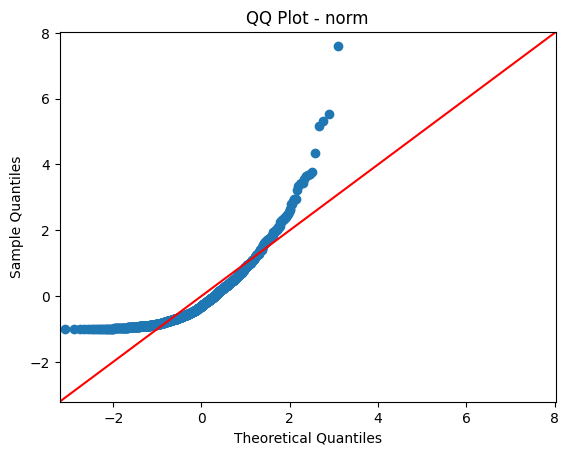

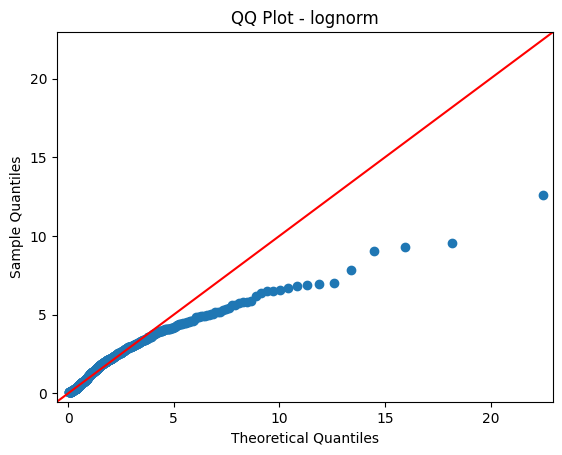

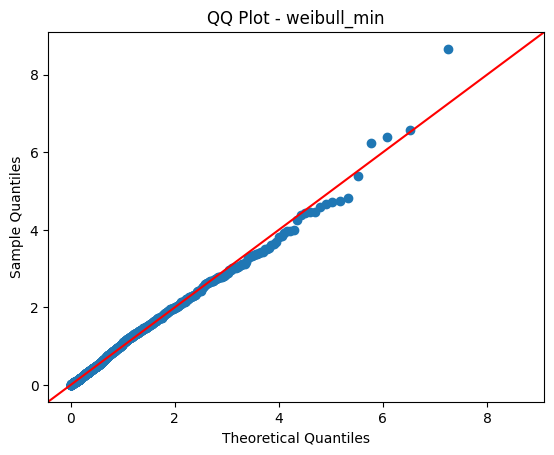

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import expon, gamma, norm, lognorm, weibull_min

# Gere dados de uma distribuição não normal (exponencial neste caso)
dados = np.random.exponential(scale=1, size=1000)

# Distribuições a serem testadas
distribuicoes = [expon, gamma, norm, lognorm, weibull_min]

# Crie um QQ Plot para cada distribuição
plt.figure(figsize=(12, 8))

for distribuicao in distribuicoes:
    # Ajuste dos parâmetros da distribuição
    params = distribuicao.fit(dados)

    # Gere os quantis teóricos
    teoricos = distribuicao.ppf(np.linspace(0.01, 0.99, 100), *params)

    # Crie o QQ Plot
    sm.qqplot(dados, line='45', dist=distribuicao, fit=True, loc=params[-2], scale=params[-1])
    plt.title(f'QQ Plot - {distribuicao.name}')
    plt.show()



Ter um grande número de distribuições pode tornar o código mais lento, e nem todas as distribuições podem ser apropriadas para seus dados.

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759:

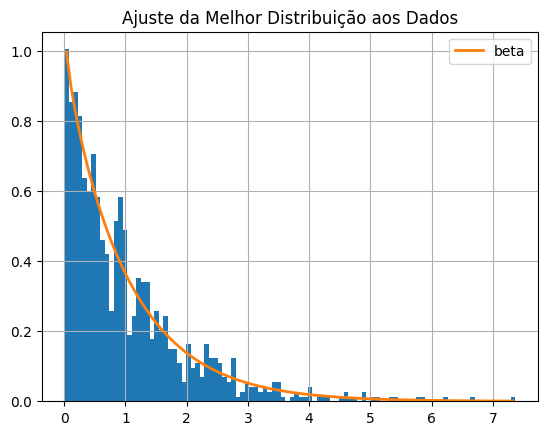

In [ ]:
!pip install fitter
import numpy as np
import matplotlib.pyplot as plt
from fitter import Fitter

# Gere dados de uma distribuição não normal (exponencial neste caso)
dados = np.random.exponential(scale=1, size=1000)

# Use a biblioteca fitter para ajustar várias distribuições automaticamente
f = Fitter(dados)
f.fit()

# Mostre as melhores distribuições
f.summary()

# Plote a melhor distribuição ajustada
plt.hist(dados, bins=30, density=True, alpha=0.6, color='g')

# Adicione informações ao gráfico
f.summary(Nbest=1)
f.get_best()

plt.legend()
plt.title('Ajuste da Melhor Distribuição aos Dados')
plt.show()


# Visão geral das distribuições que melhor se ajustam aos dados e facilita a comparação visual
Essa abordagem fornece uma visão geral das distribuições que melhor se ajustam aos dados e facilita a comparação visual. Novamente, é importante ressaltar que a escolha da distribuição adequada depende da natureza específica dos dados e pode exigir análises adicionais para confirmar a adequação do ajuste.

o código faz o seguinte:

Função best_fit_distribution: Essa função tenta ajustar várias distribuições estatísticas aos dados fornecidos e retorna uma lista das melhores distribuições em termos de soma dos quadrados dos erros (SSE). A função itera sobre várias distribuições disponíveis no módulo scipy.stats, exceto algumas que são conhecidas por não se aplicarem bem a todos os conjuntos de dados.

Função make_pdf: Essa função gera a Função de Distribuição de Probabilidade (PDF) para uma distribuição específica com base nos parâmetros ajustados.

Carregamento dos Dados: Os dados são carregados a partir do conjunto de dados "El Niño" fornecido pelo módulo statsmodels.

Plotagem do Histograma Inicial: Um histograma dos dados é plotado para visualização.

Ajuste de Distribuições e Plotagem: A função best_fit_distribution é chamada para encontrar as melhores distribuições e plotá-las no mesmo gráfico do histograma. A distribuição com a menor SSE é destacada.

Atualização do Gráfico: O gráfico é atualizado com as informações das distribuições ajustadas.



/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.



0      23.11
1      24.20
2      25.37
3      23.86
4      23.03
       ...  
727    19.49
728    19.28
729    19.73
730    20.44
731    22.07
Length: 732, dtype: float64


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The erro

  1 / 106: ksone
  2 / 106: kstwo
  3 / 106: kstwobign


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The erro

  4 / 106: norm
  5 / 106: alpha
  6 / 106: anglit


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.



  7 / 106: arcsine
  8 / 106: beta


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.



  9 / 106: betaprime


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.



 10 / 106: bradford
 11 / 106: burr


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.



 12 / 106: burr12


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.



 13 / 106: fisk
 14 / 106: cauchy
 15 / 106: chi
 16 / 106: chi2


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.



 17 / 106: cosine
 18 / 106: dgamma


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.



 19 / 106: dweibull
 20 / 106: expon
 21 / 106: exponnorm
 22 / 106: exponweib


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.



 23 / 106: exponpow
 24 / 106: fatiguelife
 25 / 106: foldcauchy


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.



 26 / 106: f
 27 / 106: foldnorm
 28 / 106: weibull_min


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.



 29 / 106: truncweibull_min


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.



 30 / 106: weibull_max
 31 / 106: genlogistic
 32 / 106: genpareto


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.



 33 / 106: genexpon
 34 / 106: genextreme
 35 / 106: gamma
 36 / 106: erlang


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.



 37 / 106: gengamma
 38 / 106: genhalflogistic
 39 / 106: genhyperbolic


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.



 40 / 106: gompertz
 41 / 106: gumbel_r


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.



 42 / 106: gumbel_l


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.



 43 / 106: halfcauchy
 44 / 106: halflogistic
 45 / 106: halfnorm
 46 / 106: hypsecant
 47 / 106: gausshyper
 48 / 106: invgamma
 49 / 106: invgauss
 50 / 106: geninvgauss
 51 / 106: norminvgauss
 52 / 106: invweibull
 53 / 106: johnsonsb
 54 / 106: johnsonsu
 55 / 106: laplace
 56 / 106: laplace_asymmetric
 57 / 106: levy
 58 / 106: levy_l
 59 / 106: logistic
 60 / 106: loggamma
 61 / 106: loglaplace
 62 / 106: lognorm
 63 / 106: gibrat
 64 / 106: maxwell
 65 / 106: mielke
 66 / 106: kappa4


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.



 67 / 106: kappa3
 68 / 106: moyal
 69 / 106: nakagami
 70 / 106: ncx2


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.



 71 / 106: ncf


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.



 72 / 106: t
 73 / 106: nct


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.



 74 / 106: pareto
 75 / 106: lomax
 76 / 106: pearson3
 77 / 106: powerlaw
 78 / 106: powerlognorm


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.



 79 / 106: powernorm


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.



 80 / 106: rdist
 81 / 106: rayleigh
 82 / 106: loguniform


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advis

 83 / 106: reciprocal


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning:

The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.



 84 / 106: rice
 85 / 106: recipinvgauss
 86 / 106: semicircular
 87 / 106: skewcauchy
 88 / 106: skewnorm
 89 / 106: trapezoid
 90 / 106: trapz
 91 / 106: triang
 92 / 106: truncexpon
 93 / 106: truncnorm
 94 / 106: truncpareto
 95 / 106: tukeylambda
 96 / 106: uniform
 97 / 106: vonmises
 98 / 106: vonmises_line
 99 / 106: wald
100 / 106: wrapcauchy
101 / 106: gennorm
102 / 106: halfgennorm
103 / 106: crystalball
104 / 106: argus
105 / 106: rel_breitwigner


Text(0, 0.5, 'Frequência')

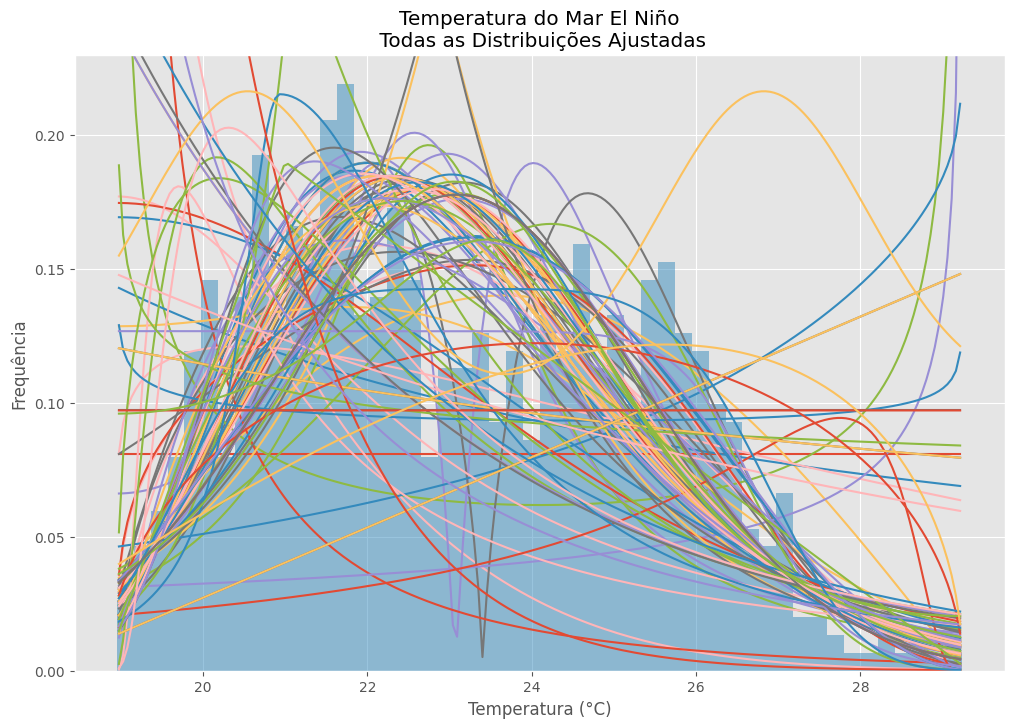

In [ ]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Cria modelos a partir dos dados
def melhor_distribuicao_ajustada(data, bins=200, ax=None):
    """Modela os dados encontrando a melhor distribuição ajustada aos dados"""
    # Obtém o histograma dos dados originais
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Listas para armazenar as melhores distribuições
    melhores_distribuicoes = []

    # Estima os parâmetros da distribuição a partir dos dados
    for ii, distribuicao in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribuicao ))

        distribuicao = getattr(st, distribuicao)

        # Tenta ajustar a distribuição aos dados
        try:
            # Ignora avisos de dados que não podem ser ajustados
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # Ajusta a distribuição aos dados
                params = distribuicao.fit(data)

                # Separa partes dos parâmetros
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calcula a PDF ajustada e o erro com o ajuste na distribuição
                pdf = distribuicao.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # Se o eixo estiver passado, adiciona ao gráfico
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # Identifica se esta distribuição é melhor
                melhores_distribuicoes.append((distribuicao, params, sse))

        except Exception:
            pass


    return sorted(melhores_distribuicoes, key=lambda x:x[2])

def gera_pdf(dist, params, size=10000):
    """Gera a Função de Distribuição de Probabilidade (PDF) de uma distribuição específica"""

    # Separa partes dos parâmetros
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Obtém pontos de início e fim da distribuição
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Constrói a PDF e converte em uma Series do pandas
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Carrega dados dos conjuntos de dados statsmodels
dados = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())
print(dados)

# Gráfico para comparação
plt.figure(figsize=(12,8))
ax = dados.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# Salva os limites do gráfico
dataYLim = ax.get_ylim()

# Encontra a melhor distribuição ajustada
melhores_distribuicoes = melhor_distribuicao_ajustada(dados, 200, ax)
melhor_dist = melhores_distribuicoes[0]

# Atualiza o gráfico
ax.set_ylim(dataYLim)
ax.set_title(u'Temperatura do Mar El Niño\n Todas as Distribuições Ajustadas')
ax.set_xlabel(u'Temperatura (°C)')
ax.set_ylabel('Frequência')
